**Assignment 2**


**Name: Anuska Nath**

**IT (UG3), section:A3**

**Roll: 002311001003**

**a. Write a Python program to load and read a binary dataset from a CSV file and** **draw the corresponding graph considering the dataset as an adjacency matrix.**

Adjacency Matrix:
[[0 1 0 0 1 0 0 0]
 [1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1]
 [1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 1 0 0 1 0]]


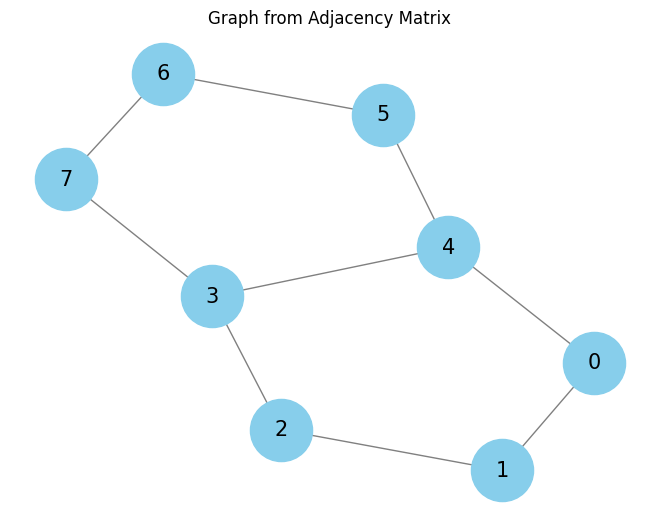

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv

def load_adjacency_matrix(csv_file):
    """Load binary adjacency matrix from a CSV file."""
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        matrix = [list(map(int, row)) for row in reader]
    return np.array(matrix)

def draw_graph(adj_matrix):
    """Draw the graph using NetworkX from the adjacency matrix."""
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph if not np.array_equal(adj_matrix, adj_matrix.T) else nx.Graph)

    # Set labels as node numbers
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=15)
    plt.title("Graph from Adjacency Matrix")
    plt.show()

def main():
    csv_file = "adjacency_matrix.csv"
    adj_matrix = load_adjacency_matrix(csv_file)
    print("Adjacency Matrix:")
    print(adj_matrix)
    draw_graph(adj_matrix)

if __name__ == "__main__":
    main()

**b. Do the same as mentioned above for a numerical dataset.**

Adjacency Matrix:
[[0.  2.5 0.  0.  3.  0.  0.  0. ]
 [2.5 0.  1.8 0.  0.  0.  0.  0. ]
 [0.  1.8 0.  2.2 0.  0.  0.  0. ]
 [0.  0.  2.2 0.  2.7 0.  0.  4. ]
 [3.  0.  0.  2.7 0.  3.5 0.  0. ]
 [0.  0.  0.  0.  3.5 0.  2.1 0. ]
 [0.  0.  0.  0.  0.  2.1 0.  1.9]
 [0.  0.  0.  4.  0.  0.  1.9 0. ]]


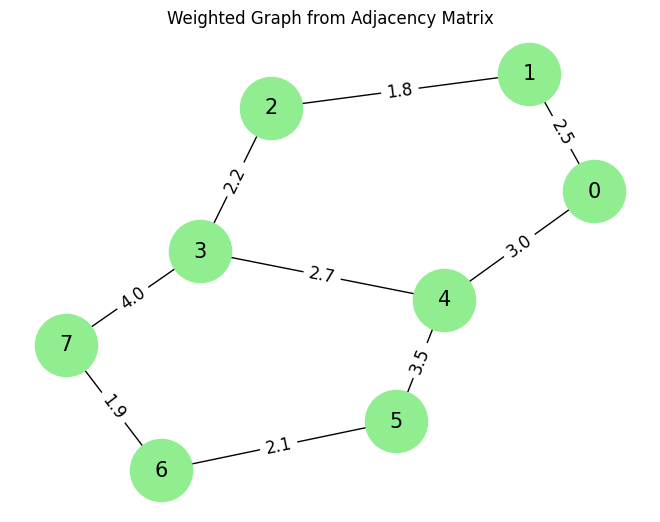

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv

def load_adjacency_matrix(csv_file):
    """Load numerical adjacency matrix from a CSV file."""
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        matrix = [list(map(float, row)) for row in reader]
    return np.array(matrix)

def draw_weighted_graph(adj_matrix):
    """Draw a weighted graph using NetworkX from a numerical adjacency matrix."""
    # Create directed or undirected graph depending on matrix symmetry
    is_symmetric = np.allclose(adj_matrix, adj_matrix.T)
    G = nx.from_numpy_array(adj_matrix, create_using=nx.Graph if is_symmetric else nx.DiGraph)

    # Remove edges with zero weight (i.e., no connection)
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] == 0]
    G.remove_edges_from(edges_to_remove)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    plt.title("Weighted Graph from Adjacency Matrix")
    plt.show()

def main():
    csv_file = "weighted_adjacency_matrix.csv"
    adj_matrix = load_adjacency_matrix(csv_file)
    print("Adjacency Matrix:")
    print(adj_matrix)
    draw_weighted_graph(adj_matrix)

if __name__ == "__main__":
    main()